In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [2]:
df_customers = pd.read_csv('messy_data\customers.csv')
df_invoices = pd.read_csv('messy_data\invoices.csv')
df_shirts = pd.read_csv('messy_data\shirts.csv')
shutil.copy('messy_data\demands.csv', 'cleaned_data\demands.csv')
shutil.copy('messy_data\import_details.csv', 'cleaned_data\import_details.csv')
shutil.copy('messy_data\imports.csv', 'cleaned_data\imports.csv')
shutil.copy('messy_data\invoice_details.csv', 'cleaned_data\invoice_details.csv')
shutil.copy('messy_data\shops.csv', 'cleaned_data\shops.csv')

'cleaned_data\\shops.csv'

<div class="alert alert-info" role="alert">
  <span style="font-size: larger;"><strong>Boxplot Function</strong></span>
</div>

In [3]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

<div class="alert alert-info" role="alert">
  <span style="font-size: larger;"><strong>Outlier Detection Function</strong></span>
</div>

In [4]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

<div class="alert alert-info" role="alert">
  <span style="font-size: larger;"><strong>Remove Outlier Function</strong></span>
</div>

In [5]:
def remove(df, index_outlier):
    index_outlier = sorted(set(index_outlier))
    df = df.drop(index_outlier)
    return df

<div class="alert alert-info" role="alert">
  <span style="font-size: larger;"><strong>Data Preproccessing</strong></span>
</div>

<div class="alert alert-info" role="alert">
  <span style="font-size: larger;"><strong>Customers Dataset</strong></span>
</div>

In [6]:
df_customers

,CusID,CusName,Gender,PhoneNumber,Address
0,955,Chan Sovanna,F,013 057 100,Takeo
1,391,Vong Dara,F,084 049 005,Kep
2,847,Theng Vanna,NaN,NaN,Pursat
3,854,Thy Dara,F,093 088 039,Kampong Cham
4,59,Thach Veasna,M,069 028 038,Takeo
...,...,...,...,...,...
1015,1000,Thach Chenda,F,083 081 081,Kandal
1016,635,Vann Ratanak,F,010 048 080,Ratanakiri
1017,960,Theng Chan,M,090 010 054,Tboung Khmum
1018,241,Ung Ratanak,M,NaN,NaN


#### Fill the missing data

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df = df_customers.copy()
df['PhoneNumber'] = imputer.fit_transform(df[['PhoneNumber']])
df['Gender'] = imputer.fit_transform(df[['Gender']])
df['Address'] = imputer.fit_transform(df[['Address']])
df_customers = df.copy()
df_customers

,CusID,CusName,Gender,PhoneNumber,Address
0,955,Chan Sovanna,F,013 057 100,Takeo
1,391,Vong Dara,F,084 049 005,Kep
2,847,Theng Vanna,Unknown,Unknown,Pursat
3,854,Thy Dara,F,093 088 039,Kampong Cham
4,59,Thach Veasna,M,069 028 038,Takeo
...,...,...,...,...,...
1015,1000,Thach Chenda,F,083 081 081,Kandal
1016,635,Vann Ratanak,F,010 048 080,Ratanakiri
1017,960,Theng Chan,M,090 010 054,Tboung Khmum
1018,241,Ung Ratanak,M,Unknown,Unknown


#### Clean the duplicates

In [8]:
#clean duplicated CusID and reset the index of the DataFrame
df_customers = df_customers.drop_duplicates(subset='CusID', keep='first')
df_customers.to_csv('cleaned_data/customers.csv', index=False)
df_customers

,CusID,CusName,Gender,PhoneNumber,Address
0,955,Chan Sovanna,F,013 057 100,Takeo
1,391,Vong Dara,F,084 049 005,Kep
2,847,Theng Vanna,Unknown,Unknown,Pursat
3,854,Thy Dara,F,093 088 039,Kampong Cham
4,59,Thach Veasna,M,069 028 038,Takeo
...,...,...,...,...,...
995,243,Sam Sophea,F,Unknown,Prey Veng
996,127,Thay Chan,F,038 064 067,Unknown
997,103,Rath Piseth,Unknown,Unknown,Phnom Penh
998,522,Chuon Chan,M,086 094 042,Prey Veng


<div class="alert alert-info" role="alert">
  <span style="font-size: larger;"><strong>Shirts Dataset</strong></span>
</div>

In [9]:
df_shirts

,ShirtID,Color,Size,StockQty,UnitPrice,Discount,ShopID
0,1,purple,L,50,85,0.4,5
1,2,blue,S,45,3,0.4,1
2,3,white,S,50,9,0.3,3
3,4,red,XL,494,1,0.4,2
4,5,purple,S,85,2,0.2,3
5,6,grey,S,449,2,0.1,3
6,7,orange,XL,50,5,0.2,3
7,8,purple,M,55,5,0.4,5
8,9,black,S,35,3,0.4,4
9,10,orange,M,65,57,0.3,1


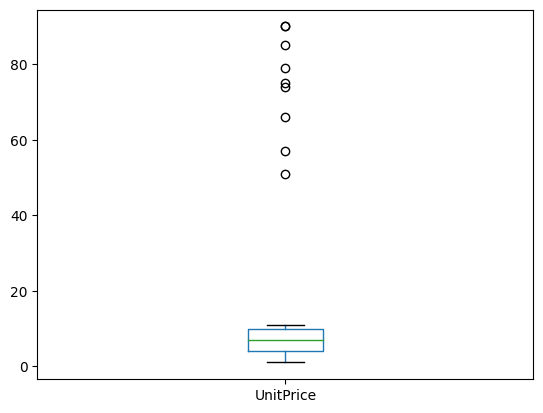

In [10]:
plot_boxplot(df_shirts, 'UnitPrice')

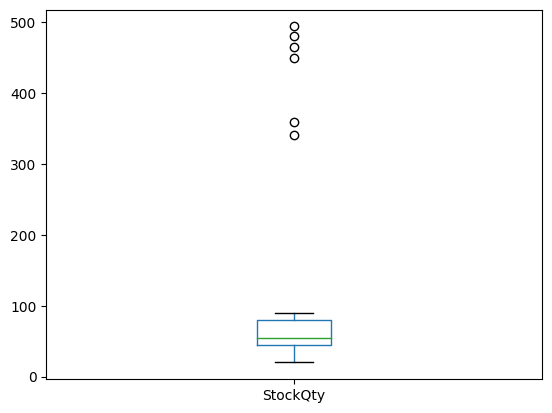

In [11]:
plot_boxplot(df_shirts, 'StockQty')

In [12]:
#try to find the outliers in the dataset
index_outlier = []
for feature in ['StockQty',	'UnitPrice']:
    index_outlier.extend(outliers(df_shirts, feature))

#remove the outliers from the dataset
df_cleaned = remove(df_shirts, index_outlier)
df_cleaned.to_csv('cleaned_data/shirts.csv', index=False)
df_cleaned

,ShirtID,Color,Size,StockQty,UnitPrice,Discount,ShopID
1,2,blue,S,45,3,0.4,1
2,3,white,S,50,9,0.3,3
4,5,purple,S,85,2,0.2,3
6,7,orange,XL,50,5,0.2,3
7,8,purple,M,55,5,0.4,5
8,9,black,S,35,3,0.4,4
11,12,yellow,XXL,65,3,0.1,4
12,13,yellow,M,65,1,0.1,1
13,14,white,M,45,2,0.3,1
16,17,grey,L,25,7,0.4,5


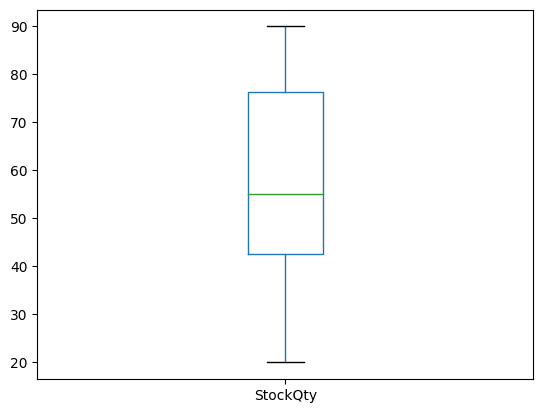

In [13]:
plot_boxplot(df_cleaned, 'StockQty')

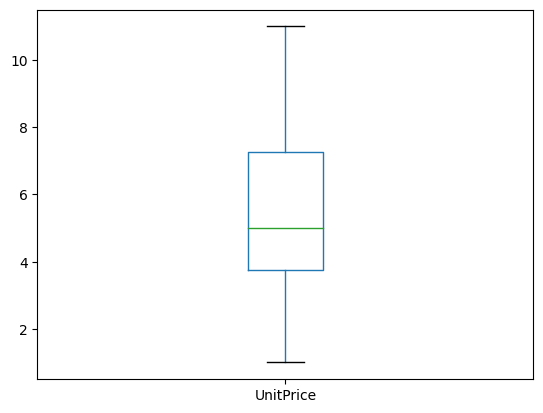

In [14]:
plot_boxplot(df_cleaned, 'UnitPrice')

<div class="alert alert-info" role="alert">
  <span style="font-size: larger;"><strong>Invoices Dataset</strong></span>
</div>

In [15]:
df_invoices

,InvoiceID,InvoiceDate,TotalAmount,CusID
0,1,2022-03-14,545.8,871
1,2,2022-02-28,552.1,273
2,3,2020-10-01,270.3,18
3,4,2023-03-15,177.7,258
4,5,2022-01-16,411.1,386
...,...,...,...,...
995,996,2022-11-07,369.7,840
996,997,2023-01-04,107.2,526
997,998,2021-03-14,346.7,190
998,999,2021-09-02,504.1,670


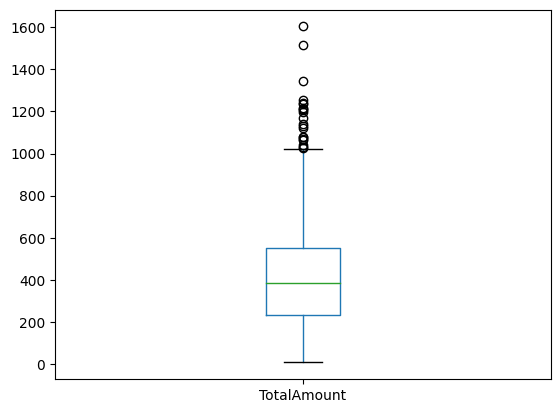

In [16]:
plot_boxplot(df_invoices, 'TotalAmount')

In [17]:
index_outlier = outliers(df_invoices, 'TotalAmount')
df_invoices_cleaned = remove(df_invoices, index_outlier)
df_invoices_cleaned.to_csv('cleaned_data/invoices.csv', index=False)
df_invoices_cleaned

,InvoiceID,InvoiceDate,TotalAmount,CusID
0,1,2022-03-14,545.8,871
1,2,2022-02-28,552.1,273
2,3,2020-10-01,270.3,18
3,4,2023-03-15,177.7,258
4,5,2022-01-16,411.1,386
...,...,...,...,...
995,996,2022-11-07,369.7,840
996,997,2023-01-04,107.2,526
997,998,2021-03-14,346.7,190
998,999,2021-09-02,504.1,670


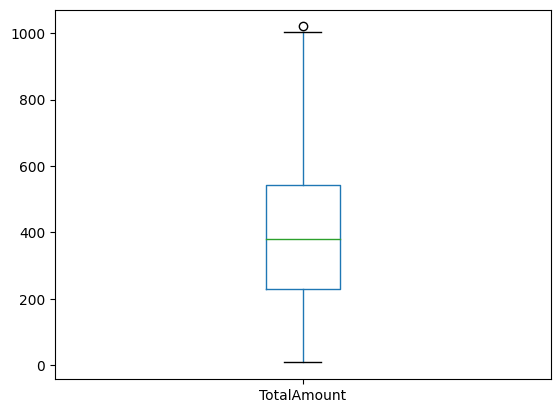

In [18]:
plot_boxplot(df_invoices_cleaned, 'TotalAmount')

In [19]:
index_outlier = outliers(df_invoices_cleaned, 'TotalAmount')
df_invoices_cleaned = remove(df_invoices_cleaned, index_outlier)
df_invoices_cleaned.to_csv('cleaned_data/invoices.csv', index=False)
df_invoices_cleaned

,InvoiceID,InvoiceDate,TotalAmount,CusID
0,1,2022-03-14,545.8,871
1,2,2022-02-28,552.1,273
2,3,2020-10-01,270.3,18
3,4,2023-03-15,177.7,258
4,5,2022-01-16,411.1,386
...,...,...,...,...
995,996,2022-11-07,369.7,840
996,997,2023-01-04,107.2,526
997,998,2021-03-14,346.7,190
998,999,2021-09-02,504.1,670


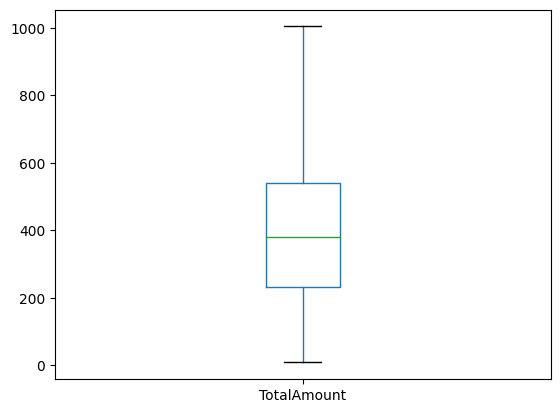

In [20]:
plot_boxplot(df_invoices_cleaned, 'TotalAmount')

In [21]:
index_outlier = outliers(df_invoices_cleaned, 'TotalAmount')
df_invoices_cleaned = remove(df_invoices_cleaned, index_outlier)
df_invoices_cleaned.to_csv('cleaned_data/invoices.csv', index=False)
df_invoices_cleaned

,InvoiceID,InvoiceDate,TotalAmount,CusID
0,1,2022-03-14,545.8,871
1,2,2022-02-28,552.1,273
2,3,2020-10-01,270.3,18
3,4,2023-03-15,177.7,258
4,5,2022-01-16,411.1,386
...,...,...,...,...
995,996,2022-11-07,369.7,840
996,997,2023-01-04,107.2,526
997,998,2021-03-14,346.7,190
998,999,2021-09-02,504.1,670


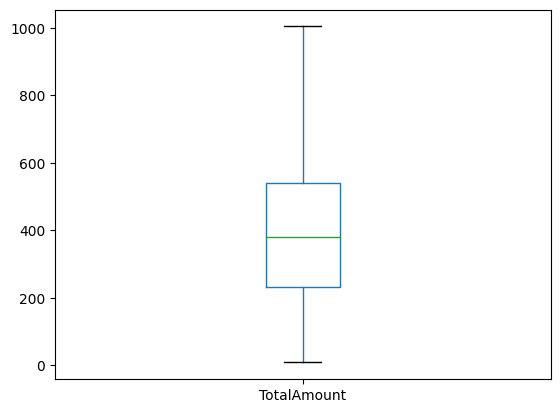

In [22]:
plot_boxplot(df_invoices_cleaned, 'TotalAmount')